In [47]:
import numpy as np
import csaps
import matplotlib.pyplot as plt
import scipy.interpolate


In [48]:

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.get_cmap(name, n)


cmap = get_cmap(10)

In [49]:
def getXFLR_3DPolar(filename):
    Array = np.loadtxt(filename, skiprows=8)
    AoA = Array[:, 0]
    CL = Array[:, 2]
    CD = Array[:, 5]
    Cm = Array[:, 8]

    return AoA, CL, CD, Cm




In [50]:
file_names = {
    0: 'T1-25_0 m_s-VLM1_0.txt',
    -5: 'T1-25_0 m_s-VLM1_05_down.txt',
    5: 'T1-25_0 m_s-VLM1_05_up.txt',
    -10: 'T1-25_0 m_s-VLM1_10_down.txt',
    10: 'T1-25_0 m_s-VLM1_10_up.txt',
    -15: 'T1-25_0 m_s-VLM1_15_down.txt',
    15: 'T1-25_0 m_s-VLM1_15_up.txt',
    -20: 'T1-25_0 m_s-VLM1_20_down.txt',
    20: 'T1-25_0 m_s-VLM1_20_up.txt',
}



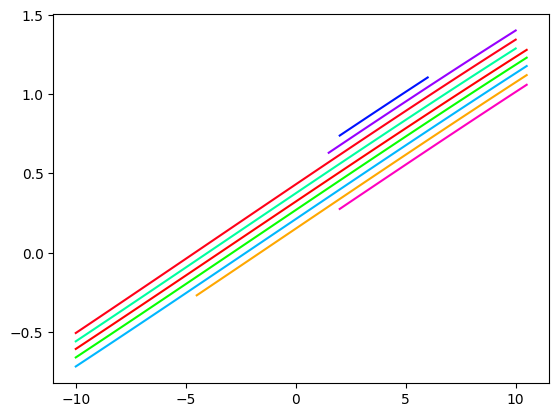

In [51]:
import random

for angle, file_name in file_names.items():
    AoA, CL, CD, Cm = getXFLR_3DPolar(file_name)
    plt.plot(AoA, CL, c=cmap(random.randint(0, 10)))

plt.show()

In [61]:
results = {}

for angle, file_name in file_names.items():
    print(angle, file_name)
    AoA, CL, CD, Cm = getXFLR_3DPolar(file_name)
    cs = csaps.csaps(AoA, CL)
    sc = csaps.csaps(CL, AoA)
    dCL = cs(1) - cs(0)
    Alpha0 = sc(0)

    results[angle] = {
        'file_name': file_name,
        'cs': cs,
        'sc': sc,
        'dCL': dCL,
        'Alpha0': Alpha0
    }





0 T1-25_0 m_s-VLM1_0.txt
dict_items([(0, {'file_name': 'T1-25_0 m_s-VLM1_0.txt', 'cs': <csaps.CubicSmoothingSpline object at 0x137780830>, 'sc': <csaps.CubicSmoothingSpline object at 0x137717560>, 'dCL': np.float64(0.09310387496856914), 'Alpha0': array(-3.4553847)})])
-5 T1-25_0 m_s-VLM1_05_down.txt
dict_items([(0, {'file_name': 'T1-25_0 m_s-VLM1_0.txt', 'cs': <csaps.CubicSmoothingSpline object at 0x137780830>, 'sc': <csaps.CubicSmoothingSpline object at 0x137717560>, 'dCL': np.float64(0.09310387496856914), 'Alpha0': array(-3.4553847)}), (-5, {'file_name': 'T1-25_0 m_s-VLM1_05_down.txt', 'cs': <csaps.CubicSmoothingSpline object at 0x137827560>, 'sc': <csaps.CubicSmoothingSpline object at 0x1378b5040>, 'dCL': np.float64(0.09333084906794731), 'Alpha0': array(-4.00211213)})])
5 T1-25_0 m_s-VLM1_05_up.txt
dict_items([(0, {'file_name': 'T1-25_0 m_s-VLM1_0.txt', 'cs': <csaps.CubicSmoothingSpline object at 0x137780830>, 'sc': <csaps.CubicSmoothingSpline object at 0x137717560>, 'dCL': np.float

In [64]:

cs20d = results[-20]['cs']
cs15d = results[-15]['cs']
dCLdDelta = (cs20d(5) - cs15d(5)) / 5
dCLdDelta

np.float64(0.012259789323628322)